# ▶️ YouTube Video Analysis
### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
# ============== 2. Data Loading ==============
# Load YouTube US comments data skipping corrupted rows
df = pd.read_csv(os.path.join("..", "data", "UScomments.csv"), on_bad_lines = "skip")

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_27860/3473035399.py:3: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB
None
           video_id comment_text   likes  replies
count        

In [4]:
# ============== 3. Data Cleaning ==============
# Check for missing values
print(df.isnull().values.any())

# Check location and quantity of missing values
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace = True)

True
video_id         0
comment_text    26
likes            0
replies          0
dtype: int64


In [5]:
# ============== 4. Exploratory Data Analysis (EDA) ==============
# Sentiment analysis
sia = SentimentIntensityAnalyzer()

# Generate comment polarity score
df['polarity'] = df['comment_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [6]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


In [7]:
# Wordcloud analysis

# Get positive comments based on polarity score
filter_pos = df['polarity'] >= 0.8
comments_pos = df[filter_pos]
comments_pos.shape

(91912, 5)

In [8]:
# Join all comments into a single string
all_positive_comments = ' '.join(comments_pos['comment_text'])

In [9]:
# Get negative comments based on polarity score
filter_neg = df['polarity'] <= -0.8
comments_neg = df[filter_neg]
comments_neg.shape

(18023, 5)

In [10]:
# Join all comments into a single string
all_negative_comments = ' '.join(comments_neg['comment_text'])

In [11]:
# Get keywords from all positive comments
wordcloud_pos = WordCloud(stopwords = set(STOPWORDS)).generate(all_positive_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

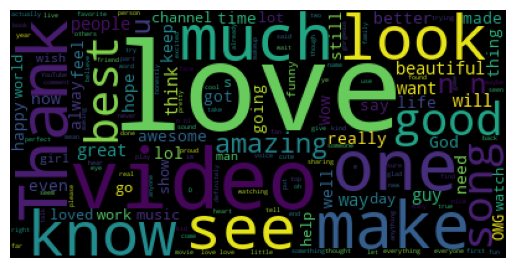

In [12]:
# Generate positive comments wordcloud
plt.imshow(wordcloud_pos)
plt.axis("off")

In [13]:
# Get keywords from all negative comments
wordcloud_neg = WordCloud(stopwords = set(STOPWORDS)).generate(all_negative_comments)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

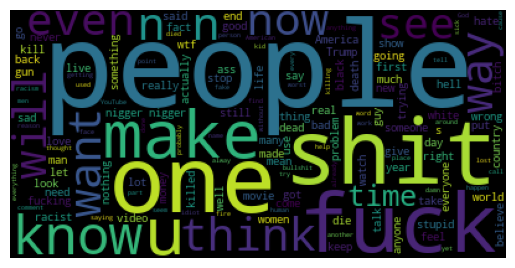

In [14]:
# Generate negative comments wordcloud
plt.imshow(wordcloud_neg)
plt.axis("off")

In [15]:
# Emoji analysis
all_emojis = []

for comment in df['comment_text']:
    emoji_info = emoji.emoji_list(comment)
    emojis_found = [item['emoji'] for item in emoji_info]
    all_emojis.extend(emojis_found)

In [16]:
# Filter the top 10 most used emojis
emojis_count_list_top10 = Counter(all_emojis).most_common(10)

In [17]:
# Create a list of emojis with their respective counts
emojis = [emoji for emoji, _ in emojis_count_list_top10]
counts = [count for _, count in emojis_count_list_top10]

In [18]:
# Plot emoji frequency using Plotly
iplot([go.Bar(x = emojis, y = counts)])

In [19]:
files = os.listdir(os.path.join("..", "data", "additional_data"))

In [20]:
files_csv = [file for file in files if file.endswith(".csv")]

In [21]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(os.path.join("..", "data", "additional_data", file), encoding='iso-8859-1', on_bad_lines="skip")
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [23]:
full_df.shape

(375942, 16)